In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import GenericUnivariateSelect, mutual_info_classif, SelectFromModel
from sklearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedKFold, GridSearchCV, cross_val_score, train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import PowerTransformer
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor

In [74]:
# Импортируем датасет
sold_flats_df = pd.read_csv('datasets/sold_flats_2020-09-30 (2).csv')
sold_flats_df

C:\Users\anshm\AppData\Local\Temp\ipykernel_7852\2487865643.py:2: DtypeWarning: Columns (35) have mixed types. Specify dtype option on import or set low_memory=False.
  sold_flats_df = pd.read_csv('datasets/sold_flats_2020-09-30 (2).csv')


,id,status,city_id,district_id,street_id,price,date_sold,sold_price,metro_station_id,flat_on_floor,...,keep,komunal_cost,series_id,wall_id,balcon,loggia,ceiling_height,closed_yard,longitude,latitude
0,86668,sold,23,12440,353,4980.0,2014-05-16,4880.0,0.0,0,...,cosmetic,NaN,46.0,11.0,yes_balcon,0,0.00,NaN,65.552498,57.143242
1,87951,sold,23,5279,263,2550.0,2014-02-17,2550.0,0.0,0,...,well_black,1000,50.0,12.0,yes_balcon,0,0.00,NaN,65.567250,57.110282
2,90703,sold,23,588,339,2200.0,2014-07-04,2200.0,0.0,0,...,cosmetic,NaN,45.0,12.0,yes_balcon,0,0.00,NaN,65.593887,57.147141
3,92948,sold,23,139,546,650.0,2014-09-03,650.0,0.0,0,...,need,NaN,79.0,11.0,no_balcon,0,2.50,NaN,65.518670,57.144386
4,102940,sold,23,5279,263,3300.0,2017-11-09,3300.0,0.0,0,...,good,NaN,50.0,12.0,loggia,0,2.53,NaN,65.568459,57.113392
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71756,1943190,sold,45,1063,3396,800.0,2017-12-30,550.0,0.0,0,...,need,NaN,45.0,14.0,no_balcon,0,2.50,NaN,60.627604,56.886927
71757,1943221,sold,748,12307,55431,1900.0,2017-12-27,1900.0,0.0,0,...,good,NaN,1600.0,14.0,yes_balcon,0,2.50,NaN,37.340514,44.891338
71758,1944254,sold,259,20943,83118,2250.0,2017-12-29,2250.0,0.0,0,...,cosmetic,NaN,49.0,11.0,yes_balcon,0,2.50,NaN,NaN,NaN
71759,1945163,sold,220,4107,29382,2000.0,2017-12-28,1800.0,0.0,0,...,cosmetic,NaN,45.0,12.0,no_balcon,0,2.50,NaN,86.160831,55.352140


In [75]:
sold_flats_df.columns

Index(['id', 'status', 'city_id', 'district_id', 'street_id', 'price',
       'date_sold', 'sold_price', 'metro_station_id', 'flat_on_floor',
       'floor_num', 'floors_cnt', 'rooms_cnt', 'bedrooms_cnt', 'building_year',
       'area_total', 'area_live', 'area_kitchen', 'area_balcony', 'builder_id',
       'type', 'two_levels', 'levels_count', 'bathroom', 'bathrooms_cnt',
       'plate', 'windows', 'territory', 'keep', 'komunal_cost', 'series_id',
       'wall_id', 'balcon', 'loggia', 'ceiling_height', 'closed_yard',
       'longitude', 'latitude'],
      dtype='object')

In [76]:
sold_flats_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71761 entries, 0 to 71760
Data columns (total 38 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                71761 non-null  int64  
 1   status            71761 non-null  object 
 2   city_id           71761 non-null  int64  
 3   district_id       71761 non-null  int64  
 4   street_id         71761 non-null  int64  
 5   price             71751 non-null  float64
 6   date_sold         71761 non-null  object 
 7   sold_price        71621 non-null  float64
 8   metro_station_id  71756 non-null  float64
 9   flat_on_floor     71761 non-null  int64  
 10  floor_num         71755 non-null  float64
 11  floors_cnt        71755 non-null  float64
 12  rooms_cnt         71479 non-null  float64
 13  bedrooms_cnt      71015 non-null  float64
 14  building_year     70168 non-null  float64
 15  area_total        71758 non-null  float64
 16  area_live         71758 non-null  float6

In [77]:
flats = sold_flats_df.copy()

In [78]:
# Сначала избавимся от параметров, которые не влияют на стоимость
flats.drop(['builder_id', 'longitude', 'latitude', 'date_sold', 'id', 'status'], axis=1, inplace=True)
flats

,city_id,district_id,street_id,price,sold_price,metro_station_id,flat_on_floor,floor_num,floors_cnt,rooms_cnt,...,windows,territory,keep,komunal_cost,series_id,wall_id,balcon,loggia,ceiling_height,closed_yard
0,23,12440,353,4980.0,4880.0,0.0,0,5.0,9.0,3.0,...,plastic,"parking,closed,elevator",cosmetic,NaN,46.0,11.0,yes_balcon,0,0.00,NaN
1,23,5279,263,2550.0,2550.0,0.0,0,5.0,10.0,1.0,...,wood,"parking,guest_parking,yard_opened,elevator",well_black,1000,50.0,12.0,yes_balcon,0,0.00,NaN
2,23,588,339,2200.0,2200.0,0.0,0,5.0,5.0,2.0,...,plastic,"parking,yard_opened,without_elevator",cosmetic,NaN,45.0,12.0,yes_balcon,0,0.00,NaN
3,23,139,546,650.0,650.0,0.0,0,1.0,4.0,2.0,...,plastic,"parking,guest_parking,yard_opened,without_elev...",need,NaN,79.0,11.0,no_balcon,0,2.50,NaN
4,23,5279,263,3300.0,3300.0,0.0,0,1.0,10.0,3.0,...,plastic,"kolyasochnaya,parking,yard_opened,elevator",good,NaN,50.0,12.0,loggia,0,2.53,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71756,45,1063,3396,800.0,550.0,0.0,0,1.0,2.0,1.0,...,wood,"yard_opened,parking,without_elevator",need,NaN,45.0,14.0,no_balcon,0,2.50,NaN
71757,748,12307,55431,1900.0,1900.0,0.0,0,8.0,12.0,1.0,...,plastic,"yard_opened,parking,guest_parking,elevator",good,NaN,1600.0,14.0,yes_balcon,0,2.50,NaN
71758,259,20943,83118,2250.0,2250.0,0.0,0,5.0,5.0,4.0,...,plastic,"yard_opened,parking,without_elevator",cosmetic,NaN,49.0,11.0,yes_balcon,0,2.50,NaN
71759,220,4107,29382,2000.0,1800.0,0.0,0,2.0,5.0,4.0,...,plastic,"child_place,parking,closed,yard_opened,without...",cosmetic,NaN,45.0,12.0,no_balcon,0,2.50,NaN


In [79]:
# Уберем из набора записи, которые не имеют указанной стоимости
flats.drop(flats[flats['price'].isnull() == True].index, inplace=True)
flats.drop(flats[flats['sold_price'].isnull() == True].index, inplace=True)
flats

,city_id,district_id,street_id,price,sold_price,metro_station_id,flat_on_floor,floor_num,floors_cnt,rooms_cnt,...,windows,territory,keep,komunal_cost,series_id,wall_id,balcon,loggia,ceiling_height,closed_yard
0,23,12440,353,4980.0,4880.0,0.0,0,5.0,9.0,3.0,...,plastic,"parking,closed,elevator",cosmetic,NaN,46.0,11.0,yes_balcon,0,0.00,NaN
1,23,5279,263,2550.0,2550.0,0.0,0,5.0,10.0,1.0,...,wood,"parking,guest_parking,yard_opened,elevator",well_black,1000,50.0,12.0,yes_balcon,0,0.00,NaN
2,23,588,339,2200.0,2200.0,0.0,0,5.0,5.0,2.0,...,plastic,"parking,yard_opened,without_elevator",cosmetic,NaN,45.0,12.0,yes_balcon,0,0.00,NaN
3,23,139,546,650.0,650.0,0.0,0,1.0,4.0,2.0,...,plastic,"parking,guest_parking,yard_opened,without_elev...",need,NaN,79.0,11.0,no_balcon,0,2.50,NaN
4,23,5279,263,3300.0,3300.0,0.0,0,1.0,10.0,3.0,...,plastic,"kolyasochnaya,parking,yard_opened,elevator",good,NaN,50.0,12.0,loggia,0,2.53,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71756,45,1063,3396,800.0,550.0,0.0,0,1.0,2.0,1.0,...,wood,"yard_opened,parking,without_elevator",need,NaN,45.0,14.0,no_balcon,0,2.50,NaN
71757,748,12307,55431,1900.0,1900.0,0.0,0,8.0,12.0,1.0,...,plastic,"yard_opened,parking,guest_parking,elevator",good,NaN,1600.0,14.0,yes_balcon,0,2.50,NaN
71758,259,20943,83118,2250.0,2250.0,0.0,0,5.0,5.0,4.0,...,plastic,"yard_opened,parking,without_elevator",cosmetic,NaN,49.0,11.0,yes_balcon,0,2.50,NaN
71759,220,4107,29382,2000.0,1800.0,0.0,0,2.0,5.0,4.0,...,plastic,"child_place,parking,closed,yard_opened,without...",cosmetic,NaN,45.0,12.0,no_balcon,0,2.50,NaN


In [80]:
# Найдем кол-во неуказанных значений в параметрах
for col in flats.columns:
    print(f'NaN in {col}: {flats[col].isnull().sum()}')

NaN in city_id: 0
NaN in district_id: 0
NaN in street_id: 0
NaN in price: 0
NaN in sold_price: 0
NaN in metro_station_id: 2
NaN in flat_on_floor: 0
NaN in floor_num: 1
NaN in floors_cnt: 1
NaN in rooms_cnt: 280
NaN in bedrooms_cnt: 741
NaN in building_year: 1583
NaN in area_total: 0
NaN in area_live: 0
NaN in area_kitchen: 0
NaN in area_balcony: 14366
NaN in type: 0
NaN in two_levels: 0
NaN in levels_count: 0
NaN in bathroom: 0
NaN in bathrooms_cnt: 30983
NaN in plate: 38892
NaN in windows: 0
NaN in territory: 1579
NaN in keep: 3
NaN in komunal_cost: 64241
NaN in series_id: 197
NaN in wall_id: 1
NaN in balcon: 0
NaN in loggia: 0
NaN in ceiling_height: 0
NaN in closed_yard: 68437


In [81]:
cats = flats.select_dtypes(include='object')
cats

,area_balcony,type,two_levels,bathroom,plate,windows,territory,keep,komunal_cost,balcon,closed_yard
0,0,flat,no,unite,electric,plastic,"parking,closed,elevator",cosmetic,NaN,yes_balcon,NaN
1,0,flat,no,separate,electric,wood,"parking,guest_parking,yard_opened,elevator",well_black,1000,yes_balcon,NaN
2,0,flat,no,separate,NaN,plastic,"parking,yard_opened,without_elevator",cosmetic,NaN,yes_balcon,NaN
3,0,flat,no,separate,no_plate,plastic,"parking,guest_parking,yard_opened,without_elev...",need,NaN,no_balcon,NaN
4,4,flat,no,separate,electric,plastic,"kolyasochnaya,parking,yard_opened,elevator",good,NaN,loggia,NaN
...,...,...,...,...,...,...,...,...,...,...,...
71756,NaN,room,no,unite,gas,wood,"yard_opened,parking,without_elevator",need,NaN,no_balcon,NaN
71757,NaN,flat,no,unite,NaN,plastic,"yard_opened,parking,guest_parking,elevator",good,NaN,yes_balcon,NaN
71758,NaN,flat,no,separate,NaN,plastic,"yard_opened,parking,without_elevator",cosmetic,NaN,yes_balcon,NaN
71759,NaN,flat,no,separate,NaN,plastic,"child_place,parking,closed,yard_opened,without...",cosmetic,NaN,no_balcon,NaN


In [82]:
# Найдем все значения в категориальных переменных
#" ".join(filter(str.isalpha, map(str, list(cats[col].unique()))))
for col in cats.columns:
    print(f'\nUniques in {col} are \n{cats[col].unique()}\n')


Uniques in area_balcony are 
['0' '4' '6.8' '3' '7.6' '3.3' '2.7' '4.5' '18' '6' '1.9' '2.4' '5' '10.8'
 '10' '9' '3.65' nan '9.8' '-3,9' '4.4' '3.1' '2.75' '3.5' '5.4' '5.1'
 '7.2' '2.6' '5.2' '3.8' '4.1' '6.5' '2.9' '4.3' '4.6' '10.9' '1' '15'
 '4.17' '2.3' '7.4' '19.4' '2.8' '7' '6.2' '8' '5.5' '3.6' '4.77' '3.4'
 '8.2' '2' '6.1' '1.5' '4.2' '1.6' '6.6' '1.4' '1.1' '5.7' '11.8' '3.2'
 '0.8' '8.8' '11' '4.7' '5.3' '2.1' '3.7' '7.5' '8.5' '11.6' '3.34' '7.17'
 '4.62' '4.85' '7.8' '1.8' '6.4' '2.5' '1.3' '5.8' '2.2' '6.03' '4.23'
 '4.24' '0.6' '0.9' '6.11' '6.7' '1.2' '8.4' '6.3' '3.9' '5.6' '11.9'
 '10.4' '2.73' '6.9' '7.7' '1.45' '7.9' '10.2' '12' '17' '7.3' '3.74'
 '18.8' '4.8' '-0' '8.04' '3.91' '1.7' '8.6' '3.21' '9.1' '3.89' '7.49'
 '0.7' '2.89' '6.69' '5.9' '3.03' '9.4' '8.3' '8.15' '7.1' '3.13' '4.9'
 '8.7' '2.26' '0.4' '0.3' '9.5' '6.87' '6.65' '9.2' '4.21' '6.59' '13.4'
 '2.45' '1.85' '7.41' '2.44' '16.9' '4.07' '3.58' '8.48' '2.92' '1.71'
 '7.37' '11.81' '8.9' '2.27' '6.54'

In [83]:
# Импротируем написанные категоризаторы
from utils import utils
br = utils.BalconyResolver()
type_r = utils.TypeResolver()
two_l_r = utils.TwoLevelsResolver()
win_r = utils.WindowsResolver()
keep_r = utils.KeepResolver()
balcon_type_r = utils.BalconTypeResolver()
closed_y_r = utils.ClosedYardResolver()
kommunal_r = utils.KommunalResolver()
plates_r = utils.PlatesResolver()
baths_r = utils.BathroomsResolver()

In [84]:
# Категоризируем все переменные

flats['area_balcony'] = cats['area_balcony'].apply(lambda x: br.decide(x))
flats['type'] = cats['type'].apply(lambda x: type_r.decide(x))
flats['two_levels'] = cats['two_levels'].apply(lambda x: two_l_r.decide(x))
flats['windows'] = cats['windows'].apply(lambda x: win_r.decide(x))
flats['keep'] = cats['keep'].apply(lambda x: keep_r.decide(x))
flats['balcon'] = cats['balcon'].apply(lambda x: balcon_type_r.decide(x))
flats['closed_yard'] = cats['closed_yard'].apply(lambda x: closed_y_r.decide(x))
flats['bathroom'] = cats['bathroom'].apply(lambda x: baths_r.decide(x))
flats['plate'] = cats['plate'].apply(lambda x: plates_r.decide(x))
flats['plate']

0        NaN
1        NaN
2        NaN
3        1.0
4        NaN
        ... 
71756    2.0
71757    NaN
71758    NaN
71759    NaN
71760    NaN
Name: plate, Length: 71611, dtype: float64

In [85]:
# Разделим коммуналку по сезонам
flats['kommunal_cost_summer'] = [0]*len(flats)
flats['kommunal_cost_winter'] = [0]*len(flats)
flats

,city_id,district_id,street_id,price,sold_price,metro_station_id,flat_on_floor,floor_num,floors_cnt,rooms_cnt,...,keep,komunal_cost,series_id,wall_id,balcon,loggia,ceiling_height,closed_yard,kommunal_cost_summer,kommunal_cost_winter
0,23,12440,353,4980.0,4880.0,0.0,0,5.0,9.0,3.0,...,1.0,NaN,46.0,11.0,1.0,0,0.00,NaN,0,0
1,23,5279,263,2550.0,2550.0,0.0,0,5.0,10.0,1.0,...,2.0,1000,50.0,12.0,1.0,0,0.00,NaN,0,0
2,23,588,339,2200.0,2200.0,0.0,0,5.0,5.0,2.0,...,1.0,NaN,45.0,12.0,1.0,0,0.00,NaN,0,0
3,23,139,546,650.0,650.0,0.0,0,1.0,4.0,2.0,...,3.0,NaN,79.0,11.0,2.0,0,2.50,NaN,0,0
4,23,5279,263,3300.0,3300.0,0.0,0,1.0,10.0,3.0,...,4.0,NaN,50.0,12.0,3.0,0,2.53,NaN,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71756,45,1063,3396,800.0,550.0,0.0,0,1.0,2.0,1.0,...,3.0,NaN,45.0,14.0,2.0,0,2.50,NaN,0,0
71757,748,12307,55431,1900.0,1900.0,0.0,0,8.0,12.0,1.0,...,4.0,NaN,1600.0,14.0,1.0,0,2.50,NaN,0,0
71758,259,20943,83118,2250.0,2250.0,0.0,0,5.0,5.0,4.0,...,1.0,NaN,49.0,11.0,1.0,0,2.50,NaN,0,0
71759,220,4107,29382,2000.0,1800.0,0.0,0,2.0,5.0,4.0,...,1.0,NaN,45.0,12.0,2.0,0,2.50,NaN,0,0


In [86]:
general = []
summer = []
winter = []
for idx, row in cats.iterrows():
    print(row['komunal_cost'])
    gen, summ, win = kommunal_r.decide(row['komunal_cost'])
    general.append(gen)
    summer.append(summ)
    winter.append(win)

nan
1000
nan
nan
nan
nan
nan
nan
nan
nan
nan
2000
nan
nan
nan
nan
nan
nan
nan
10000-12000
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
2000-4000
nan
nan
500-550
nan
nan
2500
nan
nan
nan
nan
nan
2500-3500
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
3000-4000
nan
nan
nan
nan
1200
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
1500-3000
nan
1200-3200
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
2500-6500
nan
nan
nan
nan
nan
nan
nan
nan
nan
500
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
2000-2200
nan
nan
nan
nan
nan
nan
2200
nan
nan
nan
nan
nan
nan
nan
1500
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
2600-2800
nan
nan
nan
nan
nan
nan
nan
6000
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
1200
nan
2000
nan
nan
nan
2000
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
2000
nan
nan
nan
n

nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
1500
nan
nan
nan
nan
nan
nan
nan
nan
nan
2000
nan
nan
nan
nan
nan
nan
nan
nan
2.3
nan
nan
nan
nan
nan
nan
3000
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
4000-5000
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
1200
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
4000
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
1500
nan
nan
3500
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
6000-7000
nan
1800
nan
nan
3000
nan
nan
nan
nan
2500
nan
850
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
2500
nan
nan
nan
nan
n

nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
1500-2000
1000-1100
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
2500-3000
nan
nan
nan
nan
nan
3000
nan
2300
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
1000-1200
2500
nan
nan
nan
nan
nan
nan
nan
nan
1200
nan
nan
nan
nan
nan
2500
nan
nan
nan
nan
nan
nan
nan
4000-5000
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
1200-2300
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
2000
nan
nan
nan
nan
nan
nan
nan
nan
3000
1800-2500
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
3750
nan
nan
2000
1500-2500
nan
nan
4000-6000
nan
nan
2500
nan
nan
nan
nan
nan
nan
nan
nan
nan
3000
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
2500
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
2900
nan
nan
nan
nan
nan
nan
nan
nan
10000-11000
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
n

nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
4000
nan
nan
nan
nan
nan
4000
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
4500-5500
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
1000
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
1200-2400
nan
1800
1000
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
2000
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
1600
nan
nan
nan
nan
2000
nan
nan
nan
nan
nan
nan
2000
nan
nan
nan
nan
1400
nan
1200
nan
nan
nan
nan
nan
nan
nan
nan
2500-3500
nan
nan
nan
nan
nan
nan
nan
2000
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
2000-2500
700-1000
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
4000-5000
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
n

nan
nan
nan
nan
nan
nan
3000
nan
nan
nan
2000
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
2000
nan
nan
nan
nan
nan
nan
nan
nan
1700-2500
nan
nan
nan
nan
nan
nan
1000-3000
nan
nan
1000
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
3500
nan
nan
nan
nan
nan
nan
8000
1700-2500
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
2500
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
1800
2000
nan
2000
nan
nan
nan
nan
nan
2500
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
2500
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
2400
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
2000
nan
nan
nan
nan
3500
nan
nan
2500
nan
2700-2800
nan
nan
nan
nan
nan
nan
1500-4000
2100
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
2000
nan
nan
nan
4000
nan
nan
nan
nan
nan
nan
3500-4000
n

nan
nan
nan
nan
3000-5000
1600
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
2400
nan
nan
1800-4000
nan
4000
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
1500-1700
nan
nan
2500
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
3000
nan
nan
nan
nan
nan
nan
nan
nan
nan
2000-4000
nan
nan
2000-2500
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
3500
3000
3000-4000
nan
5000
3000-3800
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
4000
nan
nan
nan
nan
nan
nan
3000
nan
1500
3500
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
2000
nan
nan
nan
nan
nan
3500
nan
nan
nan
2500-3000
nan
nan
nan
nan
2500
nan
nan
nan
nan
nan
nan
nan
4500
nan
nan
nan
nan
nan
2700-5700
nan
nan
nan
nan
nan
nan
4000
2000
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
2 500-4 800
nan
nan
nan
nan
nan
nan
1200-2700
nan
nan
nan
3000
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
n

2600
nan
nan
nan
nan
3500
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
3500
nan
3000-3500
nan
nan
nan
nan
nan
nan
nan
nan
nan
2500
nan
2500
nan
nan
nan
nan
nan
4000-5000
600
nan
nan
nan
nan
nan
3000
nan
5000
2000
nan
nan
nan
nan
nan
nan
nan
3000
nan
nan
1800
nan
nan
nan
nan
2000
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
2000-3500
nan
nan
nan
nan
nan
nan
3500
nan
nan
nan
nan
2500-3500
nan
3000
nan
nan
nan
nan
nan
nan
nan
4000
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
3500-4500
nan
nan
nan
nan
nan
nan
nan
nan
3000
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
1800
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
2500
nan
nan
nan
1500-2500
nan
nan
nan
2500
nan
nan
nan
nan
2000-4000
nan
nan
2000-3500
nan
1500
nan
5000-6500
nan
nan
2100-3200
nan
nan
nan
nan
nan
nan
2000-3000
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
3500
nan
nan
nan
nan
nan
nan
nan
nan
nan
2700-2900
3000
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
2000-3000
nan
nan
2000
4500-5500
na

nan
nan
nan
nan
nan
nan
nan
nan
nan
1900-3500
nan
1500-2000
nan
nan
1000-2000
nan
nan
3500
nan
nan
2000
4000-6000
nan
nan
nan
nan
nan
nan
2000
nan
nan
nan
nan
nan
nan
nan
nan
nan
3000-6000
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
5000
nan
nan
nan
nan
nan
1500-5000
nan
nan
nan
3000
nan
nan
nan
2500
nan
1500
nan
nan
nan
nan
nan
nan
nan
nan
700-800
nan
2500
nan
4200
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
2000-3500
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
3000
2000
nan
2000-3000
nan
nan
nan
2000-3000
nan
nan
nan
nan
nan
nan
nan
nan
1200-2700
nan
nan
nan
nan
nan
nan
nan
1100
nan
nan
nan
nan
1000-1500
nan
nan
3800
nan
1000
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
1800
nan
nan
nan
3000-4000
nan
nan
1500-1800
3500-6000
1500
nan
nan
2000-2500
nan
nan
2500
nan
nan
nan
1500
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan


nan
nan
nan
nan
nan
nan
nan
nan
nan
1500-2500
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
2500
nan
nan
nan
nan
nan
nan
500-1000
nan
nan
3000-3500
nan
nan
nan
1500-2000
nan
nan
nan
nan
2000
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
4000
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
2500
nan
nan
nan
nan
nan
nan
nan
500-1100
nan
2000-3500
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
1500-3000
nan
nan
500
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
1000-3000
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
2000
1600-+2500
nan
nan
1500
nan
nan
nan
nan
nan
nan
nan
nan
2500
4850
nan
nan
nan
2300
nan
nan
nan
nan
nan
2500-3000
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
2800
nan
nan
nan
nan
nan
nan
nan
nan
nan
3500
nan
1000-1900
nan
nan
nan
nan
nan
nan
nan
nan
3200
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
2000
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
1500-3000


nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
2000
4000
nan
nan
nan
nan
nan
3000
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
2500-3500
3500
nan
nan
3000
2500-5000
nan
4500-5500
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
1000-1500
3000-4000
nan
nan
nan
nan
nan
nan
2000
nan
2000- 30000
nan
nan
nan
nan
2000-3000
nan
nan
5000
nan
nan
nan
5000
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
5000
nan
nan
nan
nan
nan
nan
8000-10000
nan
nan
nan
1600
nan
5000
nan
nan
nan
nan
nan
1500
nan
nan
nan
4500
nan
nan
nan
nan
nan
5000
nan
nan
nan
nan
nan
nan
nan
1500-4000
nan
1500-4200
nan
2000
nan
nan
nan
nan
nan
nan
nan
nan
3500
2500
nan
nan
nan
nan
nan
nan
nan
nan
3000
nan
nan
2500
nan
nan
nan
nan
nan
nan
3000-4000
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
6000
3000-4000
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
2000-3500
nan
nan
nan
nan
nan
3500-5000
nan
nan
nan
nan
nan
nan
2800
nan
nan
nan
nan
nan
1000
nan
nan
nan
nan
nan
nan
3000
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
na

nan
nan
nan
nan
nan
1500-3000
nan
2000-2500
nan
nan
nan
nan
nan
4000-5000
nan
nan
nan
nan
nan
nan
nan
nan
5000
nan
nan
800-1600
nan
nan
nan
nan
1300-2500
nan
2500
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
3500
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
4500-4600
3000-3500
nan
nan
nan
nan
nan
nan
nan
nan
nan
1700
nan
nan
nan
nan
nan
2000
7000
nan
nan
1500-3000
3000
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
4000
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
30000
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
4000-5000
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
3000
nan
nan
nan
nan
nan
nan
nan
2500
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
3000
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
3000-5000
nan
nan
nan
nan
nan
nan
4000
nan
nan
nan
nan
nan
nan
2500-3000
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
3000
nan
nan
nan
nan
nan
nan
nan
nan


nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
3500
nan
nan
2000
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
4000-4500
nan
12000
nan
nan
nan
nan
nan
nan
nan
nan
7000
nan
nan
nan
nan
6000
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
2500-5000
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
1500-2300
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
2600-3600
nan
nan
3500
nan
2500-500
nan
nan
nan
nan
nan
nan
4500-6500
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
3000-4000
2000
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
2500-4000
nan
nan
1950-2300
nan
nan
nan
nan
nan
nan
1000-1500
1500
nan
6000
nan
nan
nan
nan
nan
nan
nan
nan
3500-5000
nan
nan
nan
1200-1300
nan
nan
nan
1800-2200
nan
nan
nan
nan
nan
1500-2500
nan
nan
nan
nan
nan
3000
nan
nan
nan
nan
nan
nan
nan
2000-3500
3500
3500-4500
2500
nan
3500-4500
3500-4000
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
2500
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
2000
nan
nan
nan
nan
nan
30

nan
nan
nan
nan
nan
nan
2000-3000
nan
nan
nan
3500-4000
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
1800-3600
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
3000
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
2800
nan
nan
nan
1500-3000
nan
3500-4000
nan
nan
nan
2000-4500
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
2000-3000
nan
1500-3500
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
2500
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
2000
nan
nan
nan
nan
nan
nan
2500-5000
nan
nan
nan
2500
nan
nan
nan
nan
nan
3000-8000
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
3000-6000
nan
2000
nan
nan
nan
nan
nan
nan
nan
nan
5000
nan
nan
3000
nan
nan
nan
nan
nan
nan
nan
2000-3500
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
2500
nan
nan
nan
nan
nan
20
nan
nan
nan
nan
nan
nan
nan
1500-25000
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
4

nan
nan
nan
nan
nan
nan
nan
2500
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
1300-4000
nan
nan
nan
2000
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
4000
nan
nan
nan
nan
nan
nan
nan
nan
nan
1200-3000
nan
nan
nan
nan
nan
nan
nan
nan
2000-2200
nan
nan
nan
nan
nan
nan
nan
nan
nan
5000
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
3000-4000
nan
10000
nan
nan
nan
nan
nan
nan
nan
nan
1500-3000
nan
nan
nan
nan
1600-2300
nan
nan
nan
nan
nan
nan
nan
nan
3000
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
3000
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
2500
nan
nan
3000
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
40-60
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
5000
nan
nan
nan
nan
nan
nan
nan
2500-3500
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
1000-2500
nan
nan
nan
200

nan
nan
nan
nan
nan
1500
nan
3000
nan
nan
nan
2000-4000
nan
nan
2000-5000
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
3000-4000
nan
nan
nan
nan
nan
nan
nan
nan
nan
2000-3500
nan
nan
nan
nan
nan
nan
nan
nan
1500 - 2500
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
2500-3000
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
2000-2500
nan
nan
2000-3000
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
1500-2000
nan
2500-5500
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
2500-3000
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
1500
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
2800
1700-2500
nan
nan
nan
nan
nan
nan
1600
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
2000-3500
nan
nan
nan
1700-3300
nan
n

nan
nan
4500
nan
nan
nan
nan
nan
nan
nan
nan
4200-4500
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
1500-3500
4500/2000
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
1800-2300
1000-2000
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
2500-3000
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
50-100
nan
2000-4000
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
3000
nan
nan
nan
nan
2000
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
5000
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
3000-5000
nan
nan
nan
nan
nan
5300-5500
nan
nan
2000-3500
nan
nan
nan
500-1500
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
3500-7000
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
6000-8000
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
2000-3000
nan
nan
2500-4500


nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
2000-2500
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
2000-6000
nan
4000
nan
nan
nan
nan
1500-2000
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
3500
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
50-100
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
2500
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
1500-3500
nan
nan
nan
nan
nan
nan
3000-4000
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
2500-3000
nan
nan
nan
nan
40-70
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
4000-6000
nan
nan
nan
nan
nan
nan
2000
nan
nan
6500-7500
1800
nan
nan
2500
45-90
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
4000
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
3000-5000
nan
2500
2000-3500
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
4000-6000
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan

nan
2500
nan
nan
nan
nan
2000
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
4000
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
1000-2500
nan
3500-6500
nan
1500
nan
35
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
3000-4500
nan
nan
2000-3000
nan
nan
nan
nan
nan
2000-3000
nan
2300-2500
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
3000-7500
nan
nan
1800
nan
nan
nan
nan
nan
nan
nan
nan
3000
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
2000
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
1200-1700
nan
nan
nan
nan
nan
nan
3500 без счетчиков
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
5000
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
3000
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
2500-

nan
nan
nan
2000
nan
nan
nan
nan
nan
nan
nan
nan
nan
3000-5000
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
3000
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
1000-1200
1600
nan
nan
nan
nan
nan
nan
3000
nan
nan
nan
nan
nan
nan
nan
2500
nan
nan
nan
nan
nan
nan
nan
nan
1500
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
1000-1500
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
2500-2800
nan
nan
nan
2500
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
1000-3000
nan
nan
nan
nan
nan
nan
nan
nan
1500-2500
nan
nan
3000
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
1300-2400
nan
nan
nan
nan
nan
nan
nan
2500
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
2000-4000
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan

In [87]:
# Если указано одно число - оно идет в общую колонку, если чисел несколько - они идут по сезонам
flats['komunal_cost'], flats['kommunal_cost_summer'], flats['kommunal_cost_winter'] = general, summer, winter
flats['kommunal_cost_winter'].unique()

array([-1.00e+00,  1.20e+04,  4.00e+03,  5.50e+02,  3.50e+03,  3.00e+03,
        3.20e+03,  6.50e+03,  2.20e+03,  2.80e+03,  5.00e+03,  2.50e+03,
        5.50e+03,  2.00e+03,  4.50e+03,  6.00e+03,  3.80e+03,  3.30e+03,
        3.70e+03,  1.20e+03,  1.30e+03,  1.80e+03,  2.70e+03,  2.25e+03,
        7.00e+03,  1.50e+03,  2.10e+03,  8.00e+02,  4.20e+03,  1.40e+03,
        2.30e+03,  2.40e+03,  7.50e+03,  8.00e+03,  3.40e+03,  1.60e+03,
        4.80e+03,  1.70e+03,  1.10e+03,  1.10e+04,  2.60e+03,  5.10e+03,
        3.10e+03,  5.20e+03,  1.00e+04,  1.00e+03,  1.90e+03, -1.70e+03,
        6.00e+02,  3.60e+03,  4.00e+02,  4.40e+03,  4.50e+04,  1.05e+03,
        4.90e+03,  5.40e+03,  5.00e+02,  5.70e+03,  1.80e+04,  8.50e+03,
        1.50e+04,  2.90e+03,  3.00e+02,  9.00e+03,  5.80e+03,  6.80e+03,
        3.25e+03,  4.30e+03, -2.50e+03,  9.50e+03,  4.10e+03,  8.20e+03,
        5.60e+03, -1.00e+03,  4.55e+03,  4.60e+03,  1.70e+04,  2.00e+02,
        1.40e+04,  2.00e+04,  2.23e+03,  3.90e+03, 

In [88]:
# Объекты придомовой территории заменим на их кол-во
flats['territory'] = cats['territory'].apply(lambda x: len(str(x).split(',')))
flats['territory'].unique()

array([ 3,  4,  5,  6,  1,  7,  2,  9,  8, 11, 12, 10, 14, 13],
      dtype=int64)

In [89]:
flats

,city_id,district_id,street_id,price,sold_price,metro_station_id,flat_on_floor,floor_num,floors_cnt,rooms_cnt,...,keep,komunal_cost,series_id,wall_id,balcon,loggia,ceiling_height,closed_yard,kommunal_cost_summer,kommunal_cost_winter
0,23,12440,353,4980.0,4880.0,0.0,0,5.0,9.0,3.0,...,1.0,NaN,46.0,11.0,1.0,0,0.00,NaN,-1.0,-1.0
1,23,5279,263,2550.0,2550.0,0.0,0,5.0,10.0,1.0,...,2.0,1000.0,50.0,12.0,1.0,0,0.00,NaN,-1.0,-1.0
2,23,588,339,2200.0,2200.0,0.0,0,5.0,5.0,2.0,...,1.0,NaN,45.0,12.0,1.0,0,0.00,NaN,-1.0,-1.0
3,23,139,546,650.0,650.0,0.0,0,1.0,4.0,2.0,...,3.0,NaN,79.0,11.0,2.0,0,2.50,NaN,-1.0,-1.0
4,23,5279,263,3300.0,3300.0,0.0,0,1.0,10.0,3.0,...,4.0,NaN,50.0,12.0,3.0,0,2.53,NaN,-1.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71756,45,1063,3396,800.0,550.0,0.0,0,1.0,2.0,1.0,...,3.0,NaN,45.0,14.0,2.0,0,2.50,NaN,-1.0,-1.0
71757,748,12307,55431,1900.0,1900.0,0.0,0,8.0,12.0,1.0,...,4.0,NaN,1600.0,14.0,1.0,0,2.50,NaN,-1.0,-1.0
71758,259,20943,83118,2250.0,2250.0,0.0,0,5.0,5.0,4.0,...,1.0,NaN,49.0,11.0,1.0,0,2.50,NaN,-1.0,-1.0
71759,220,4107,29382,2000.0,1800.0,0.0,0,2.0,5.0,4.0,...,1.0,NaN,45.0,12.0,2.0,0,2.50,NaN,-1.0,-1.0


['price', 'sold_price', 'flat_on_floor', 'floor_num', 'floors_cnt', 'rooms_cnt', 'bedrooms_cnt', 'building_year', 'area_total', 'area_live', 'area_kitchen', 'levels_count', 'bathrooms_cnt', 'ceiling_height', 'kommunal_cost_summer', 'kommunal_cost_winter']
price


E:\Python\ml_analytics\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


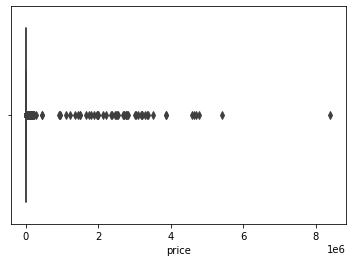

sold_price


E:\Python\ml_analytics\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


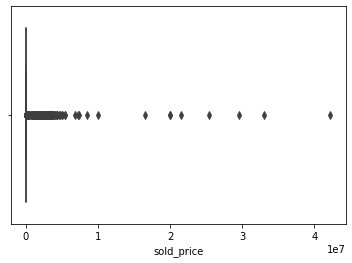

flat_on_floor


E:\Python\ml_analytics\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


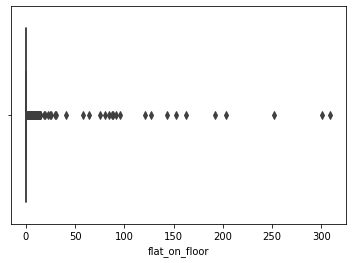

floor_num


E:\Python\ml_analytics\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


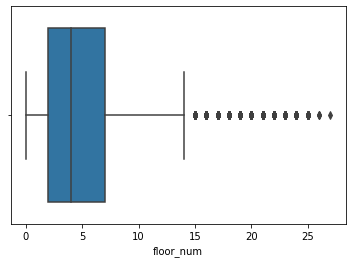

E:\Python\ml_analytics\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


floors_cnt


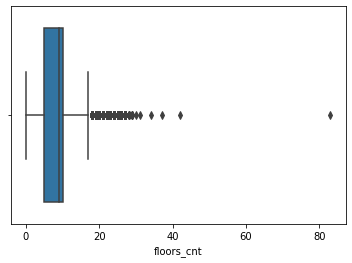

rooms_cnt


E:\Python\ml_analytics\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


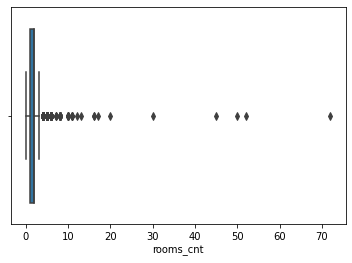

bedrooms_cnt


E:\Python\ml_analytics\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


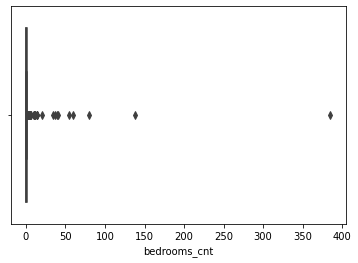

building_year


E:\Python\ml_analytics\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


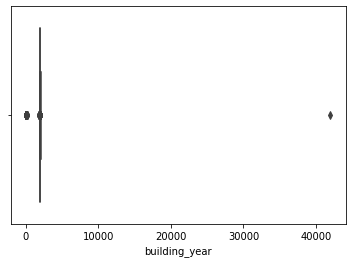

E:\Python\ml_analytics\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


area_total


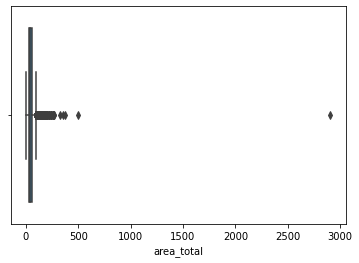

E:\Python\ml_analytics\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


area_live


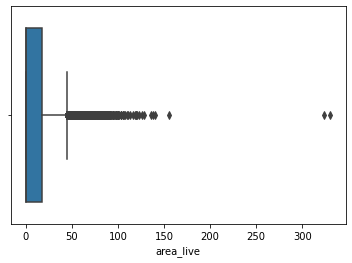

area_kitchen


E:\Python\ml_analytics\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


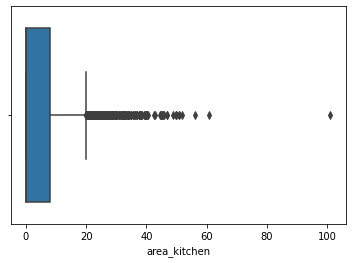

levels_count


E:\Python\ml_analytics\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


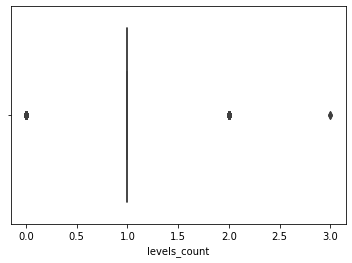

E:\Python\ml_analytics\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


bathrooms_cnt


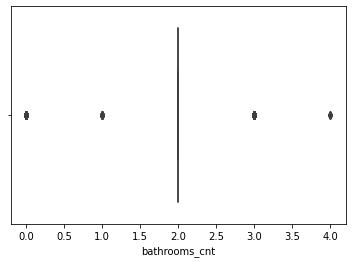

ceiling_height


E:\Python\ml_analytics\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


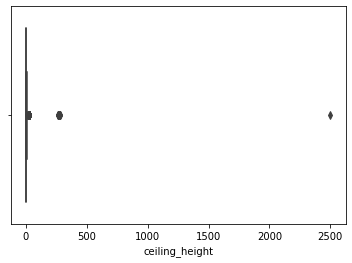

E:\Python\ml_analytics\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


kommunal_cost_summer


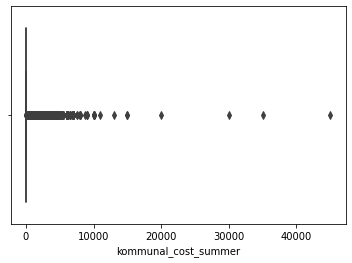

E:\Python\ml_analytics\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


kommunal_cost_winter


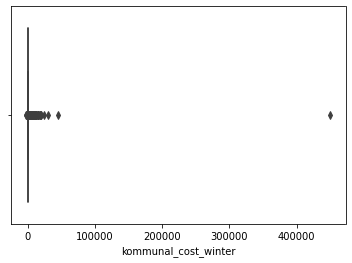

In [90]:
# Проверим данные на наличие выбросов
excl = [*cats.columns, 'city_id', 'district_id', 'street_id', 'metro_station_id', 'wall_id', 'loggia', 'series_id',]
cols_to_check = [col for col in flats.columns if col not in excl]
print(cols_to_check)
for col in cols_to_check:
    print(f'{col}')
    sns.boxplot(flats[col])
    plt.show()

In [91]:
# Очистим от выбросов
for col in cols_to_check:
    Q_2 = flats[col].quantile(0.25)
    Q_95 = flats[col].quantile(0.99)
    IQR = Q_95 - Q_2
    upper_lim = Q_95 + 1.5*IQR
    lower_lim = Q_2 - 1.5*IQR
    flats.drop(flats[(flats[col] > upper_lim) | (lower_lim > flats[col])].index, inplace=True)
flats

,city_id,district_id,street_id,price,sold_price,metro_station_id,flat_on_floor,floor_num,floors_cnt,rooms_cnt,...,keep,komunal_cost,series_id,wall_id,balcon,loggia,ceiling_height,closed_yard,kommunal_cost_summer,kommunal_cost_winter
0,23,12440,353,4980.0,4880.0,0.0,0,5.0,9.0,3.0,...,1.0,NaN,46.0,11.0,1.0,0,0.00,NaN,-1.0,-1.0
1,23,5279,263,2550.0,2550.0,0.0,0,5.0,10.0,1.0,...,2.0,1000.0,50.0,12.0,1.0,0,0.00,NaN,-1.0,-1.0
2,23,588,339,2200.0,2200.0,0.0,0,5.0,5.0,2.0,...,1.0,NaN,45.0,12.0,1.0,0,0.00,NaN,-1.0,-1.0
3,23,139,546,650.0,650.0,0.0,0,1.0,4.0,2.0,...,3.0,NaN,79.0,11.0,2.0,0,2.50,NaN,-1.0,-1.0
4,23,5279,263,3300.0,3300.0,0.0,0,1.0,10.0,3.0,...,4.0,NaN,50.0,12.0,3.0,0,2.53,NaN,-1.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71751,577,16484,64141,16000.0,16000.0,0.0,0,3.0,3.0,3.0,...,1.0,NaN,44.0,205.0,1.0,0,2.70,NaN,-1.0,-1.0
71755,246,11680,54363,1750.0,1750.0,0.0,0,5.0,9.0,2.0,...,1.0,NaN,70.0,11.0,1.0,0,2.50,NaN,-1.0,-1.0
71757,748,12307,55431,1900.0,1900.0,0.0,0,8.0,12.0,1.0,...,4.0,NaN,1600.0,14.0,1.0,0,2.50,NaN,-1.0,-1.0
71759,220,4107,29382,2000.0,1800.0,0.0,0,2.0,5.0,4.0,...,1.0,NaN,45.0,12.0,2.0,0,2.50,NaN,-1.0,-1.0


In [92]:
# Исходя из описания - отсутвует информация о кол-ве санузлов значит он 1
flats['bathrooms_cnt'] = flats['bathrooms_cnt'].fillna(1)
flats['bathrooms_cnt']

0        1.0
1        1.0
2        1.0
3        1.0
4        2.0
        ... 
71751    2.0
71755    2.0
71757    2.0
71759    2.0
71760    2.0
Name: bathrooms_cnt, Length: 63329, dtype: float64

In [93]:
y = (flats['price'] + flats['sold_price'])/2

In [94]:
flats.drop(['price', 'sold_price'], axis=1, inplace=True)

AttributeError: 'Series' object has no attribute 'nan'

In [95]:
X = flats.fillna(-1)
# Целевая переменная - стоимость объекта недвижимости

X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 63329 entries, 0 to 71760
Data columns (total 32 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   city_id               63329 non-null  int64  
 1   district_id           63329 non-null  int64  
 2   street_id             63329 non-null  int64  
 3   metro_station_id      63329 non-null  float64
 4   flat_on_floor         63329 non-null  int64  
 5   floor_num             63329 non-null  float64
 6   floors_cnt            63329 non-null  float64
 7   rooms_cnt             63329 non-null  float64
 8   bedrooms_cnt          63329 non-null  float64
 9   building_year         63329 non-null  float64
 10  area_total            63329 non-null  float64
 11  area_live             63329 non-null  float64
 12  area_kitchen          63329 non-null  float64
 13  area_balcony          63329 non-null  float64
 14  type                  63329 non-null  float64
 15  two_levels         

In [96]:
from sklearn.utils.multiclass import type_of_target
type_of_target(y)

'continuous'

In [97]:
y.max()

69900.0

In [98]:
# Оценим важность параметров с помощью f_regression и mutual_info_regression 
from sklearn.feature_selection import f_regression, mutual_info_regression
np.random.seed(0)

f_test, _ = f_regression(X, y)
f_test /= np.max(f_test)

mi = mutual_info_regression(X, y)
mi /= np.max(mi)
print(mi)
f_test

[0.8008899  0.90810107 0.86722051 0.05054964 0.0134968  0.07038703
 0.22826859 0.36358876 0.08729174 0.27880963 1.         0.18854178
 0.19779738 0.0574122  0.13702597 0.         0.00112568 0.07859223
 0.06842899 0.03325498 0.02785907 0.05976637 0.16848789 0.02481092
 0.52343171 0.12510555 0.14219461 0.         0.09197374 0.0141239
 0.03971315 0.02186039]


array([1.00000000e+00, 1.44446006e-01, 2.38610393e-01, 2.22158469e-04,
       7.03760695e-03, 3.87864243e-02, 7.40070594e-02, 2.49354592e-01,
       1.13742580e-01, 5.72385020e-03, 6.52542741e-01, 9.77780561e-02,
       9.02393100e-02, 7.97262650e-06, 5.01041915e-02, 9.92943985e-05,
       0.00000000e+00, 2.72143540e-02, 7.34270549e-02, 5.24602689e-03,
       8.74489646e-04, 2.64304838e-02, 1.33320009e-01, 5.44332701e-06,
       3.05870459e-02, 2.13199988e-01, 2.50489901e-02, 0.00000000e+00,
       3.78308603e-02, 4.68528175e-05, 5.05814017e-03, 2.08323131e-03])

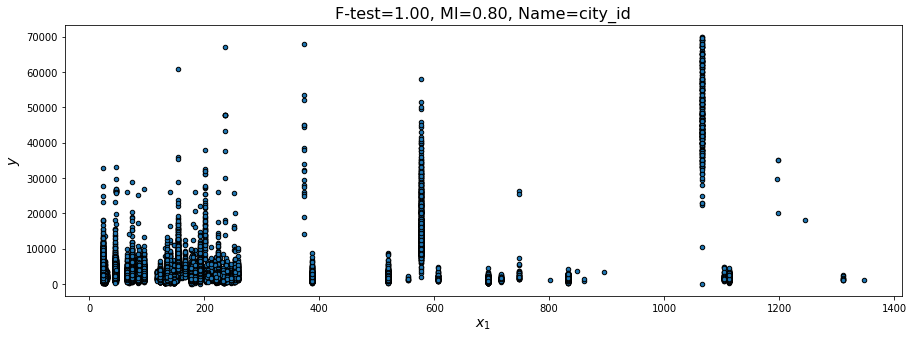

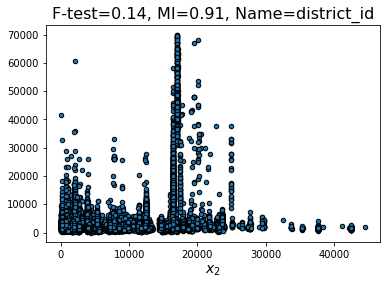

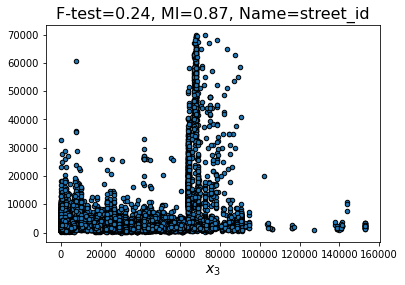

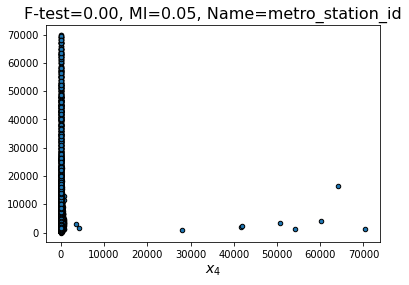

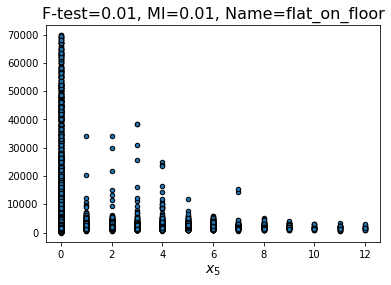

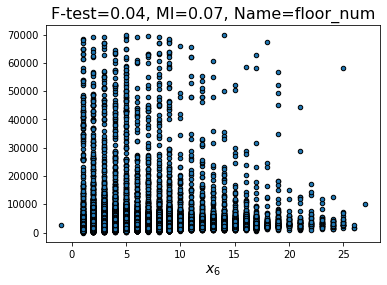

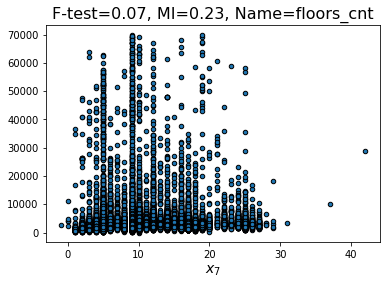

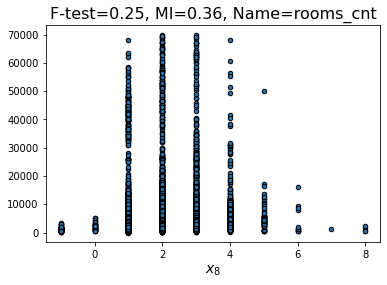

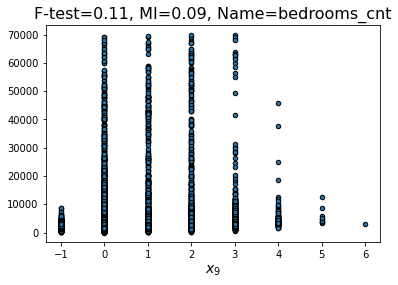

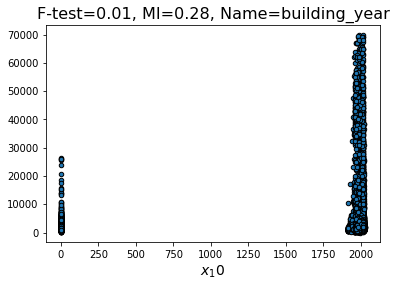

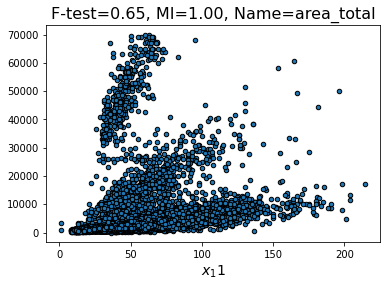

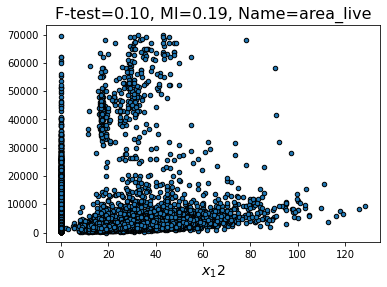

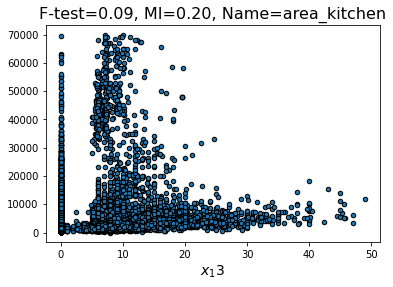

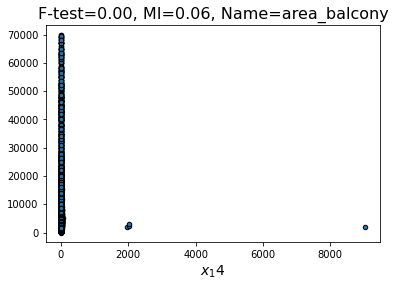

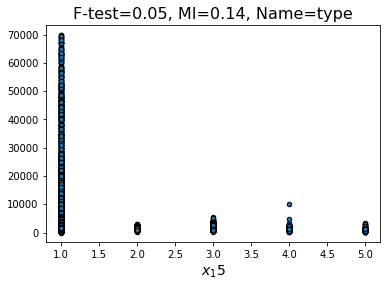

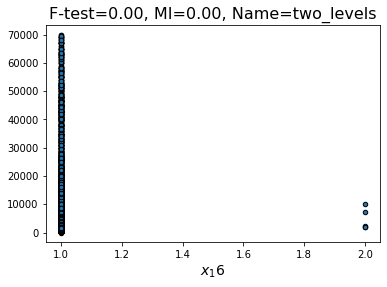

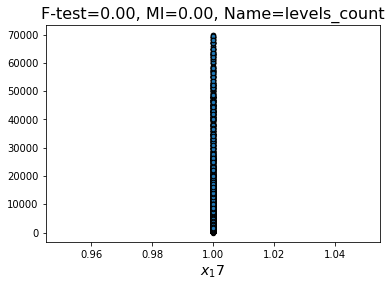

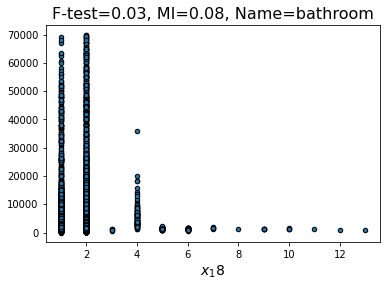

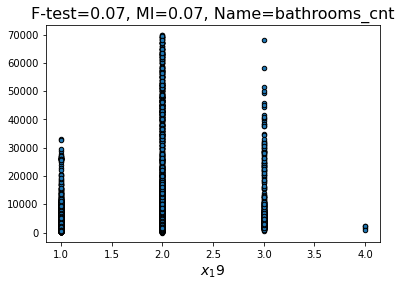

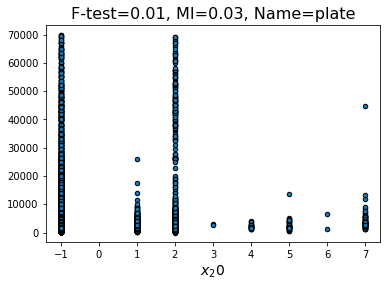

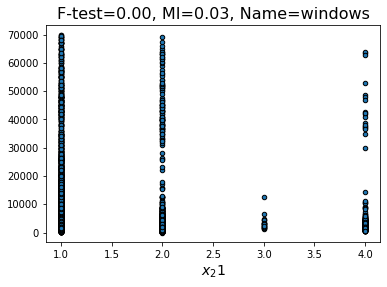

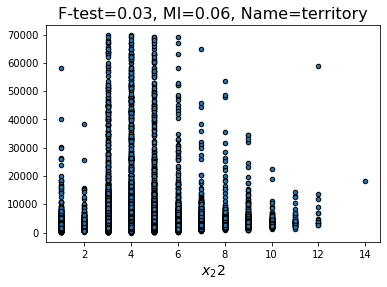

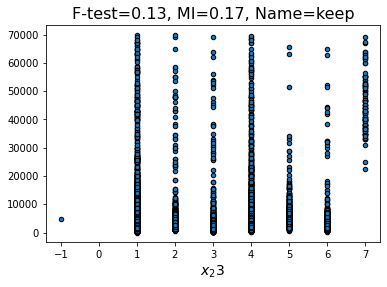

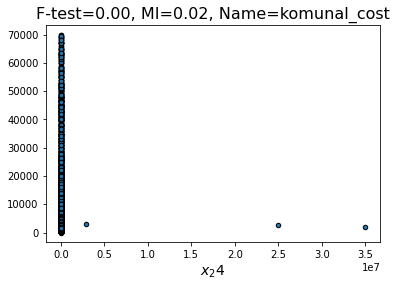

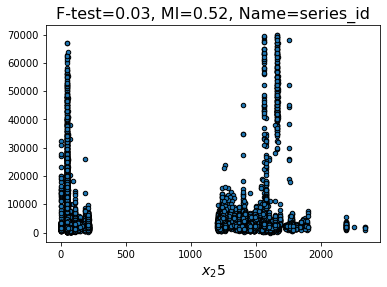

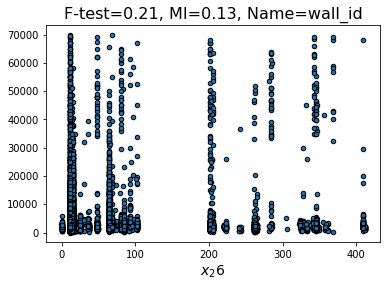

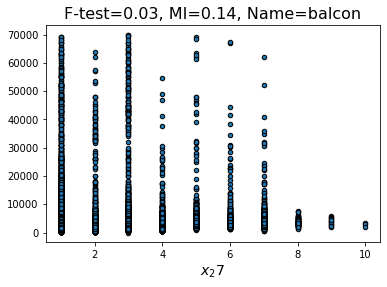

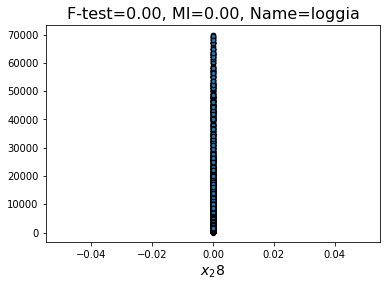

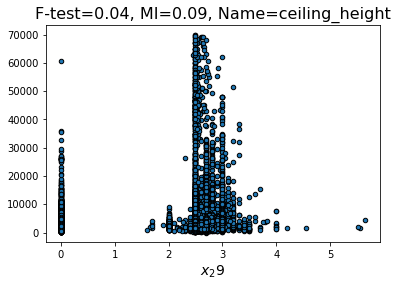

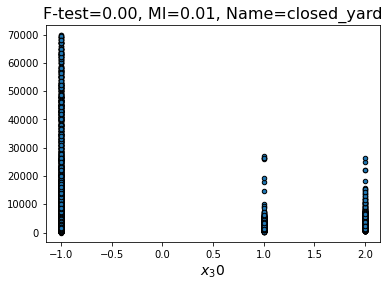

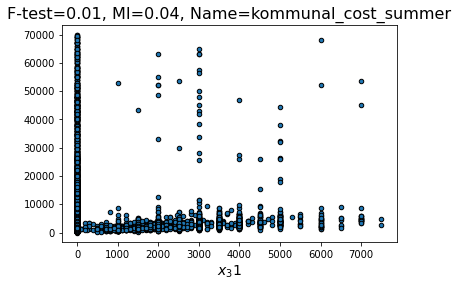

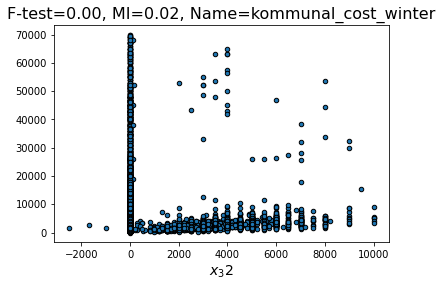

In [103]:
# Построим графики зависимости целевой переменной от параметра
plt.figure(figsize=(15, 5))
for i in range(len(X.columns)):

    plt.scatter(x=X[X.columns[i]], y=y, edgecolor="black", s=20)
    plt.xlabel("$x_{}$".format(i + 1), fontsize=14)
    if i == 0:
        plt.ylabel("$y$", fontsize=14)
    plt.title("F-test={:.2f}, MI={:.2f}, Name={}".format(f_test[i], mi[i], X.columns[i]), fontsize=16)
    plt.show()

In [104]:
# Выделим признаки, имеющие корреляцию с целевой переменной больше, чем 0.19 MI
valid_params = []
for i in range(len(X.columns)):
    if mi[i] > 0.19:
        valid_params.append(X.columns[i])
valid_params
# Таким образом получаем 9 параметров

['city_id',
 'district_id',
 'street_id',
 'floors_cnt',
 'rooms_cnt',
 'building_year',
 'area_total',
 'area_kitchen',
 'series_id']

In [116]:
X = X[valid_params]
X.reset_index(drop=True, inplace=True)
X

,city_id,district_id,street_id,floors_cnt,rooms_cnt,building_year,area_total,area_kitchen,series_id
0,23,12440,353,9.0,3.0,1989.0,62.0,8.0,46.0
1,23,5279,263,10.0,1.0,2008.0,40.0,8.0,50.0
2,23,588,339,5.0,2.0,1969.0,44.0,6.0,45.0
3,23,139,546,4.0,2.0,1960.0,42.0,6.0,79.0
4,23,5279,263,10.0,3.0,2007.0,65.0,12.0,50.0
...,...,...,...,...,...,...,...,...,...
63324,577,16484,64141,3.0,3.0,1987.0,60.0,0.0,44.0
63325,246,11680,54363,9.0,2.0,1988.0,50.5,8.2,70.0
63326,748,12307,55431,12.0,1.0,2016.0,33.0,0.0,1600.0
63327,220,4107,29382,5.0,4.0,1979.0,62.0,6.0,45.0


In [118]:
# Разобьем выборку на обучающую и тестовую
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
# Сбросим индексы
X_train.reset_index(drop=True, inplace=True)
X_test.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)

In [119]:
# Создадим регрессор, здесь я не рискну заниматься подбором гиперпараметров для бустинга, с целью экономии времени
# Хотя вообще их можно было бы подобрать через GridSearch или что-то подобное
reg = XGBRegressor() 
# Обучаем модель
reg.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [120]:
# Оценим наши объекты
preds = reg.predict(X_test)

In [126]:
# Создадим датафрейм для наглядности
resus = pd.DataFrame()
resus['preds'] = preds
resus['true'] = y_test
print(resus)
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae = mean_absolute_error(resus['true'], resus['preds'])
r2 = r2_score(resus['true'], resus['preds'])
print(f'MSE:{mse}\n\nR2:{r2}')

             preds    true
0      3022.144531  2945.0
1      2448.662842  2275.0
2      1641.591553  1450.0
3      1871.696655  1535.0
4      7148.683594  3075.0
...            ...     ...
20894  3112.950928  3075.0
20895  2546.963379  3080.0
20896  2245.573730  2400.0
20897  2577.393066  2050.0
20898  1245.186401  1150.0

[20899 rows x 2 columns]
MSE:431.08204867496545

R2:0.9179779285267449


In [128]:
# значение r2 score очень близко к 1, что достаточно хорошо
# Сохраним модель
import pickle
file_name = 'model.pkl'
pickle.dump(reg, open(file_name, "wb"))